# Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import string
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import warnings
warnings.filterwarnings("ignore")


# Loading the Dataset:

In [2]:
data=pd.read_csv("C:\\Users\\227475\OneDrive\\Desktop\\LTDC Project\\survey_results_public.csv")

# Exploratory Data Analysis:

In [3]:
data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
data.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [5]:
data.tail(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN
64460,65112,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Spain,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",ASP.NET Core;jQuery,Angular;Angular.js;ASP.NET Core;jQuery,NaN,NaN,NaN,NaN


In [6]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

Number of rows:  64461
Number of columns:  61


In [7]:
print("The columns of our dataset are: \n")
for i in range(len(list(data.columns))):
    print(list(data.columns)[i])

The columns of our dataset are: 

Respondent
MainBranch
Hobbyist
Age
Age1stCode
CompFreq
CompTotal
ConvertedComp
Country
CurrencyDesc
CurrencySymbol
DatabaseDesireNextYear
DatabaseWorkedWith
DevType
EdLevel
Employment
Ethnicity
Gender
JobFactors
JobSat
JobSeek
LanguageDesireNextYear
LanguageWorkedWith
MiscTechDesireNextYear
MiscTechWorkedWith
NEWCollabToolsDesireNextYear
NEWCollabToolsWorkedWith
NEWDevOps
NEWDevOpsImpt
NEWEdImpt
NEWJobHunt
NEWJobHuntResearch
NEWLearn
NEWOffTopic
NEWOnboardGood
NEWOtherComms
NEWOvertime
NEWPurchaseResearch
NEWPurpleLink
NEWSOSites
NEWStuck
OpSys
OrgSize
PlatformDesireNextYear
PlatformWorkedWith
PurchaseWhat
Sexuality
SOAccount
SOComm
SOPartFreq
SOVisitFreq
SurveyEase
SurveyLength
Trans
UndergradMajor
WebframeDesireNextYear
WebframeWorkedWith
WelcomeChange
WorkWeekHrs
YearsCode
YearsCodePro


In [8]:
#Number of unique values present for each column

pd.set_option('display.max_rows', None)
data.nunique()

Respondent                      64461
MainBranch                          5
Hobbyist                            2
Age                               110
Age1stCode                         63
CompFreq                            3
CompTotal                        3003
ConvertedComp                    6958
Country                           183
CurrencyDesc                      142
CurrencySymbol                    141
DatabaseDesireNextYear           3193
DatabaseWorkedWith               2808
DevType                          8269
EdLevel                             9
Employment                          7
Ethnicity                         208
Gender                              7
JobFactors                        230
JobSat                              5
JobSeek                             3
LanguageDesireNextYear          16243
LanguageWorkedWith              14256
MiscTechDesireNextYear           5216
MiscTechWorkedWith               2730
NEWCollabToolsDesireNextYear     1277
NEWCollabToo

In [9]:
# The different values possible for various columns

print(list(data['MainBranch'].unique()))
print('\n')
print(list(data['JobSeek'].unique()))
print('\n')
print(list(data['SurveyLength'].unique()))
print('\n')
print(list(data['CompFreq'].unique()))
print('\n')
print(list(data['NEWLearn'].unique()))
print('\n')
print(list(data['SOVisitFreq'].unique()))
print('\n')
print(list(data['OrgSize'].unique()))

['I am a developer by profession', 'I code primarily as a hobby', 'I used to be a developer by profession, but no longer am', 'I am not primarily a developer, but I write code sometimes as part of my work', 'I am a student who is learning to code', nan]


['I am not interested in new job opportunities', nan, 'I’m not actively looking, but I am open to new opportunities', 'I am actively looking for a job']


['Appropriate in length', nan, 'Too short', 'Too long']


['Monthly', nan, 'Yearly', 'Weekly']


['Once a year', 'Once a decade', 'Every few months', 'Once every few years', nan]


['Multiple times per day', 'Daily or almost daily', 'A few times per month or weekly', 'A few times per week', 'I have never visited Stack Overflow (before today)', nan, 'Less than once per month or monthly']


['2 to 9 employees', '1,000 to 4,999 employees', nan, '20 to 99 employees', 'Just me - I am a freelancer, sole proprietor, etc.', '10,000 or more employees', '100 to 499 employees', '500 to 999 emp

In [10]:
# Summary of null values present in the dataset.

pd.set_option('display.max_rows', None)
print(data.isnull().sum())

Respondent                          0
MainBranch                        299
Hobbyist                           45
Age                             19015
Age1stCode                       6561
CompFreq                        24392
CompTotal                       29635
ConvertedComp                   29705
Country                           389
CurrencyDesc                    18989
CurrencySymbol                  18989
DatabaseDesireNextYear          20391
DatabaseWorkedWith              14924
DevType                         15091
EdLevel                          7030
Employment                        607
Ethnicity                       18513
Gender                          13904
JobFactors                      15112
JobSat                          19267
JobSeek                         12734
LanguageDesireNextYear          10348
LanguageWorkedWith               7083
MiscTechDesireNextYear          22082
MiscTechWorkedWith              24147
NEWCollabToolsDesireNextYear    17174
NEWCollabToo

In [83]:
# The different languages and databases that respondents have worked with

# Here we observe that the LanguageWorkedWith column has a lot of different combinations of languages presnt in each row, 
# so we make a neater list to display all the unique values of languages possible. 

uniquelang =  list(pd.unique(data.LanguageWorkedWith.str.split(";", expand =  True).stack()))
for i  in range(len(uniquelang)):
    uniquelang[i] = uniquelang[i].strip()

uniquelang=[*set(uniquelang)]
print(uniquelang)

print('\n')

uniquedb =  list(pd.unique(data.DatabaseWorkedWith.str.split(";", expand =  True).stack()))
for t  in range(len(uniquedb)):
    uniquedb[t] = uniquedb[t].strip()

uniquelang=[*set(uniquedb)]
print(uniquedb)

['Scala', 'Objective-C', 'VBA', 'Swift', 'JavaScript', 'SQL', 'C++', 'Go', 'Kotlin', 'Ruby', 'PHP', 'TypeScript', 'Haskell', 'Perl', 'Bash/Shell/PowerShell', 'HTML/CSS', 'Python', 'Dart', 'Julia', 'Assembly', 'R', 'Java', 'C#', 'Rust', 'C']


['MariaDB', 'MySQL', 'Redis', 'Microsoft SQL Server', 'Firebase', 'PostgreSQL', 'Elasticsearch', 'SQLite', 'IBM DB2', 'Oracle', 'MongoDB', 'DynamoDB', 'Cassandra', 'Couchbase']


# Data Cleaning

### 1. We drop the rows which have null values for "Hobbyist" and MainBranch olumn as they are only 45 and 299 in number respectively which is very small when compared to our dataset of  64,461 rows in total.

In [13]:
print(data.shape[0])
fixhob=data['Hobbyist'].notna()
data=data[fixhob]
print(data.shape[0])
fixmb=data['MainBranch'].notna()
data=data[fixmb]
print(data.shape[0])

64461
64416
64117


#### We see that after dropping the 45 rows for date the number of rows goes from 64461 to 64416, and then after further dropping 299 rows it goes to 64117.

### 2. Dropping rows with values that are logically impossible to exist Part 1

#### The number of hours one works in a week can realistically not be more than 85.

In [14]:
print(data.WorkWeekHrs.max())
wronghours = data[data['WorkWeekHrs']>=85].index
data.drop(wronghours , inplace=True)
(data.WorkWeekHrs.max())

475.0


84.0

#### The oldest living person currently is 115 years old so age can not be more than that.

In [15]:
print(data.shape[0])
wrongage = data[data['Age']>=115].index
data.drop(wrongage , inplace=True)
print(data.shape[0])

63844
63843


#### The number of years someone has been coding professionally cannot be more than profeesional + educational.

In [16]:
print(data.shape[0])
wrongyears = data[data['YearsCodePro']>data['YearsCode']].index
data.drop(wrongyears, inplace=True)
print(data.shape[0])

63843
49091


### 3. Replacing statements in certain columns with words, as this increases computational efficiency.

In [17]:
data['MainBranch'] = np.where((data.MainBranch=='I am a developer by profession'), 'Developer', data.MainBranch)
data['MainBranch'] = np.where((data.MainBranch=='I code primarily as a hobby'), 'Hobby', data.MainBranch)
data['MainBranch'] = np.where((data.MainBranch== 'I used to be a developer by profession, but no longer am'), 'Ex-Developer', data.MainBranch)
data['MainBranch'] = np.where((data.MainBranch=='I am not primarily a developer, but I write code sometimes as part of my work'), 'PT-Developer', data.MainBranch)
data['MainBranch'] = np.where((data.MainBranch=='I am a student who is learning to code'), 'Student', data.MainBranch)

list(data['MainBranch'].unique())

['Developer', 'Hobby', 'PT-Developer', 'Student', 'Ex-Developer']

In [18]:
data['JobSeek'] = np.where((data.JobSeek=='I am not interested in new job opportunities'), 'Not Interested', data.JobSeek)
data['JobSeek'] = np.where((data.JobSeek=='I’m not actively looking, but I am open to new opportunities'), 'Maybe Interested', data.JobSeek)
data['JobSeek'] = np.where((data.JobSeek== 'I am actively looking for a job'), 'Interested', data.JobSeek)

list(data['JobSeek'].unique())

['Not Interested', nan, 'Maybe Interested', 'Interested']

In [19]:
data['SurveyLength'] = np.where((data.SurveyLength=='Too short'), 'Short', data.SurveyLength)
data['SurveyLength'] = np.where((data.SurveyLength=='Too long'), 'Long', data.SurveyLength)
data['SurveyLength'] = np.where((data.SurveyLength=='Appropriate in length'), 'Appropriate', data.SurveyLength)

list(data['SurveyLength'].unique())

['Appropriate', nan, 'Long', 'Short']

### 4. Fixing datatypes certain numerical columns.

In [20]:
data['Age1stCode'] = np.where((data.Age1stCode=='Younger than 5 years'), '4', data.Age1stCode)
data['Age1stCode'] = np.where((data.Age1stCode=='Older than 85'), '86', data.Age1stCode)
data[['Age1stCode']] = data[['Age1stCode']].astype(float)
data['Age1stCode'].fillna((data['Age1stCode'].mean()), inplace=True)


In [21]:
data['YearsCodePro'] = np.where((data.YearsCodePro=='Less than 1 year'), '0', data.YearsCodePro)
data['YearsCodePro'] = np.where((data.YearsCodePro=='More than 50 years'), '50', data.YearsCodePro)
data[['YearsCodePro']] = data[['YearsCodePro']].astype(float)


In [22]:
data['YearsCode'] = np.where((data.YearsCode=='Less than 1 year'), '0', data.YearsCode)
data['YearsCode'] = np.where((data.YearsCode=='More than 50 years'), '50', data.YearsCode)
data[['YearsCode']] = data[['YearsCode']].astype(float)


### 5. Dropping rows with values that are logically impossible to exist Part 2

In [23]:
print(data.shape[0])
wrongyears = data[data['YearsCodePro']>data['YearsCode']].index
data.drop(wrongyears, inplace=True)
print(data.shape[0])

49091
48962


In [24]:
print(data.shape[0])
wrongyears = data[data['YearsCodePro']>data['Age']].index
data.drop(wrongyears, inplace=True)
print(data.shape[0])

48962
48960


In [25]:
print(data.shape[0])
wrongyears = data[data['YearsCode']>data['Age']].index
data.drop(wrongyears, inplace=True)
print(data.shape[0])

48960
48949


In [66]:
print(data.shape[0])
wrongyears = data[data['Age1stCode']>data['Age']].index
data.drop(wrongyears, inplace=True)
print(data.shape[0])

38805
38805


### 6. Changing Visit Frequency Column to Numeric Data based on sacle.

In [29]:
data['SOVisitFreq'] = np.where((data.SOVisitFreq=='I have never visited Stack Overflow (before today)'), 'Very Low', data.SOVisitFreq)
data['SOVisitFreq'] = np.where((data.SOVisitFreq=='Less than once per month or monthly'), 'Low', data.SOVisitFreq)
data['SOVisitFreq'] = np.where((data.SOVisitFreq=='A few times per month or weekly'), 'Sometimes', data.SOVisitFreq)
data['SOVisitFreq'] = np.where((data.SOVisitFreq=='A few times per week'), 'Often', data.SOVisitFreq)
data['SOVisitFreq'] = np.where((data.SOVisitFreq=='Daily or almost daily'), 'Frequent', data.SOVisitFreq)
data['SOVisitFreq'] = np.where((data.SOVisitFreq=='Multiple times per day'), 'Very Frequent', data.SOVisitFreq)


In [30]:
freqmode=(data['SOVisitFreq'].mode())
data['SOVisitFreq']=data['SOVisitFreq'].fillna(freqmode[0])


### 7. Handling Missing Values

In [ ]:
data['YearsCodePro'].fillna((data['YearsCodePro'].mean()), inplace=True)
data['Age'].fillna((data['Age'].mean()), inplace=True)
data['WorkWeekHrs'].fillna((data['WorkWeekHrs'].mean()), inplace=True)
data['YearsCode'].fillna((data['YearsCode'].mean()), inplace=True)

In [ ]:
data[['Age1stCode']] = data[['Age1stCode']].astype(int)
data[['Age']]=data[['Age']].astype(int)
data[['YearsCodePro']] = data[['YearsCodePro']].astype(int)
data[['WorkWeekHrs']]=data[['WorkWeekHrs']].astype(int)

In [89]:
freqmode=(data['SOVisitFreq'].mode())
data['SOVisitFreq']=data['SOVisitFreq'].fillna(freqmode[0])

In [90]:
genmode=(data['Gender'].mode())
data['Gender']=data['Gender'].fillna(genmode[0])

In [91]:
ctmode=(data['Country'].mode())
data['Country']=data['Country'].fillna(ctmode[0])

### 8. Dropping rows with values that are logically impossible to exist Part 3

In [92]:
print(data.shape[0])
wrongyears = data[data['YearsCodePro']>data['YearsCode']].index
data.drop(wrongyears, inplace=True)
print(data.shape[0])

38805
38805


In [93]:
print(data.shape[0])
wrongyears = data[data['YearsCodePro']>data['Age']].index
data.drop(wrongyears, inplace=True)
print(data.shape[0])

38805
38805


In [94]:
print(data.shape[0])
wrongyears = data[data['YearsCode']>data['Age']].index
data.drop(wrongyears, inplace=True)
print(data.shape[0])

38805
38805


In [95]:
print(data.shape[0])
wrongyears = data[data['Age1stCode']>data['Age']].index
data.drop(wrongyears, inplace=True)
print(data.shape[0])

38805
38805


# Visualization

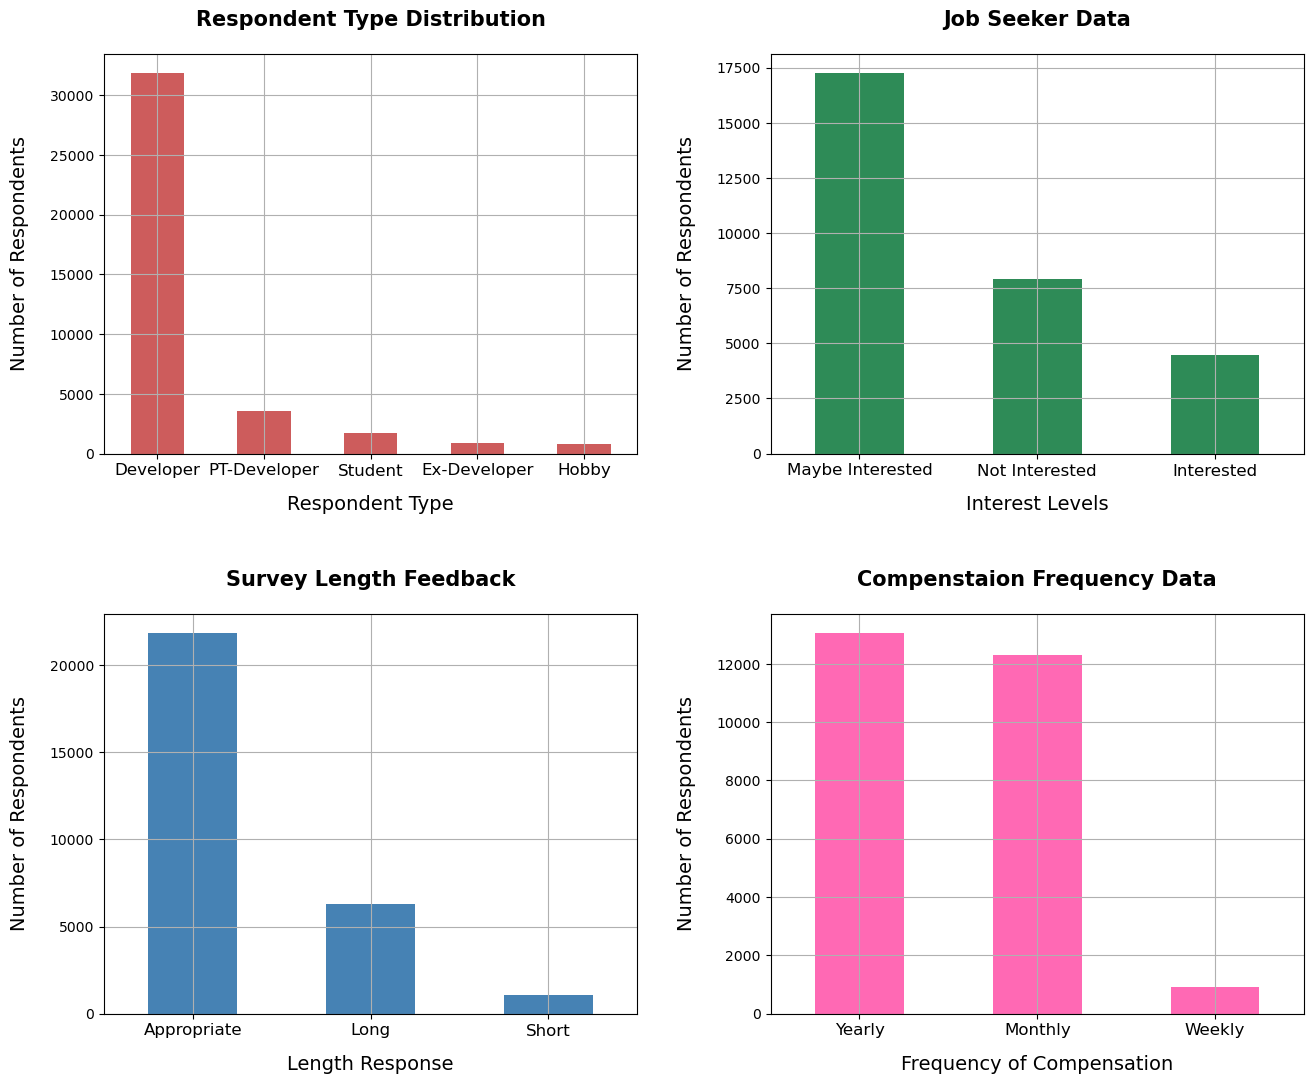

In [96]:
# Whole Column Statistics from our Dataset

fig, ax = plt.subplots(2,2,figsize=(12, 12))

plt.subplot(2,2,1)
plt.title("Respondent Type Distribution", fontsize=15, fontweight='bold', pad=20)                                               
data["MainBranch"].value_counts().plot(kind="bar",color="indianred")     
plt.xlabel("Respondent Type", fontsize=14, labelpad=12)
plt.xticks(rotation = 0, fontsize=12)
plt.ylabel("Number of Respondents", fontsize=14, labelpad=15)
plt.grid(True)

plt.subplot(2,2,2)
plt.title("Job Seeker Data", fontsize=15, fontweight='bold', pad=20)                                               
data["JobSeek"].value_counts().plot(kind="bar",color="seagreen")     
plt.xlabel("Interest Levels", fontsize=14, labelpad=12)
plt.xticks(rotation = 0, fontsize=12)
plt.ylabel("Number of Respondents", fontsize=14, labelpad=15)
plt.grid(True)

plt.subplot(2,2,3)
plt.title("Survey Length Feedback", fontsize=15, fontweight='bold', pad=20)                                               
data["SurveyLength"].value_counts().plot(kind="bar",color="steelblue")     
plt.xlabel("Length Response", fontsize=14, labelpad=12)
plt.xticks(rotation = 0, fontsize=12)
plt.ylabel("Number of Respondents", fontsize=14, labelpad=15)
plt.grid(True)

plt.subplot(2,2,4)
plt.title("Compenstaion Frequency Data", fontsize=15, fontweight='bold', pad=20)                                               
data["CompFreq"].value_counts().plot(kind="bar",color="hotpink")     
plt.xlabel("Frequency of Compensation", fontsize=14, labelpad=12)
plt.xticks(rotation = 0, fontsize=12)
plt.ylabel("Number of Respondents", fontsize=14, labelpad=15)
plt.grid(True)

plt.subplots_adjust(left=0, bottom=0.1, right=1, top=0.9, wspace=0.25, hspace=0.4)
plt.show()

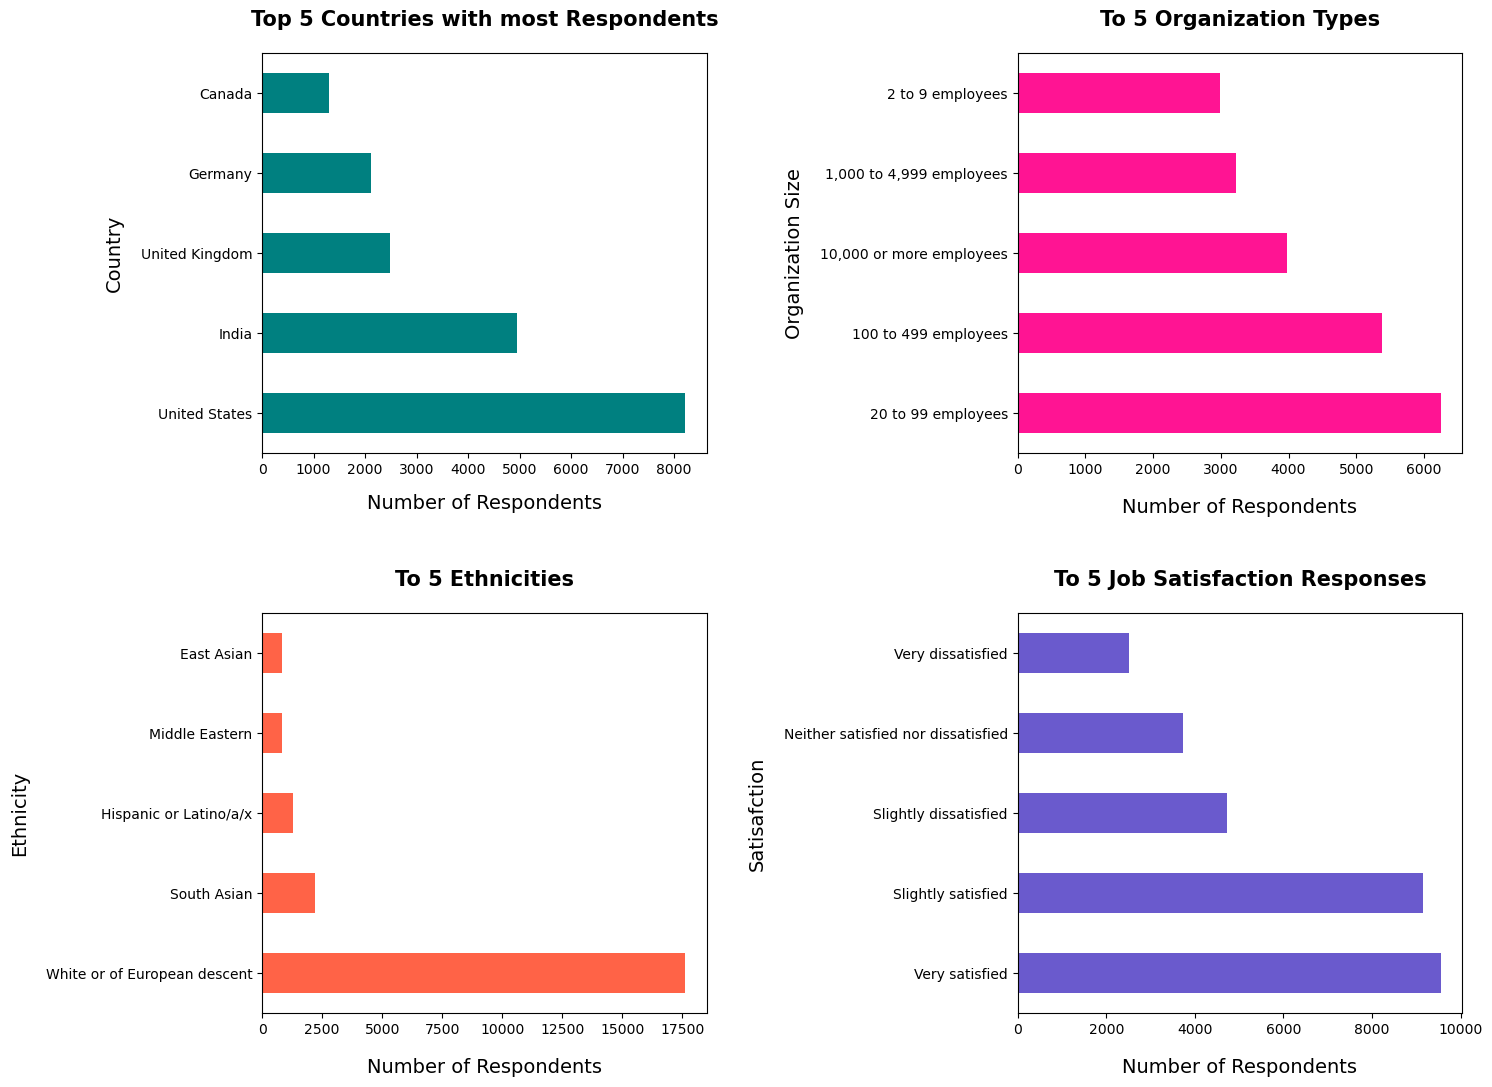

In [97]:
# Top Column Statistics from our Dataset

fig, ax = plt.subplots(2,2,figsize=(12, 12))

plt.subplot(2,2,1)
plt.title("Top 5 Countries with most Respondents", fontsize=15, fontweight='bold', pad=20)
data["Country"].value_counts().head(5).plot(kind="barh",color="teal")     
plt.xlabel("Number of Respondents", fontsize=14, labelpad=12)
plt.ylabel("Country", fontsize=14, labelpad=12)
plt.grid(False)

plt.subplot(2,2,2)
plt.title("To 5 Organization Types", fontsize=15, fontweight='bold', pad=20)                                               
data["OrgSize"].value_counts().head(5).plot(kind="barh",color="deeppink")     
plt.ylabel("Organization Size", fontsize=14, labelpad=12)
plt.xlabel("Number of Respondents", fontsize=14, labelpad=15)
plt.grid(False)

plt.subplot(2,2,3)
plt.title("To 5 Ethnicities", fontsize=15, fontweight='bold', pad=20)                                               
data["Ethnicity"].value_counts().head(5).plot(kind="barh",color="tomato")     
plt.ylabel("Ethnicity", fontsize=14, labelpad=12)
plt.xlabel("Number of Respondents", fontsize=14, labelpad=15)
plt.grid(False)

plt.subplot(2,2,4)
plt.title("To 5 Job Satisfaction Responses", fontsize=15, fontweight='bold', pad=20)                                               
data["JobSat"].value_counts().head(5).plot(kind="barh",color="slateblue")     
plt.ylabel("Satisafction", fontsize=14, labelpad=12)
plt.xlabel("Number of Respondents", fontsize=14, labelpad=15)
plt.grid(False)

plt.subplots_adjust(left=0, bottom=0.1, right=1, top=0.9, wspace=0.7, hspace=0.4)
plt.show()

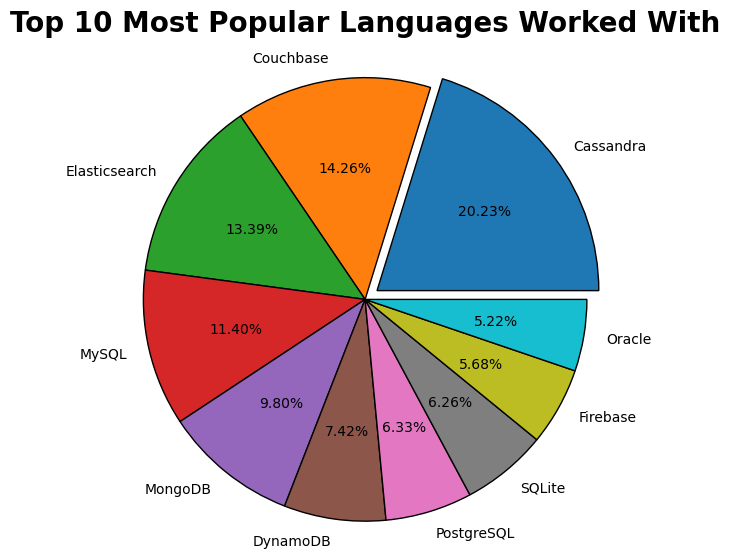

In [98]:
# Most Frequent Language Worked With


lang = list((data.DatabaseWorkedWith.str.split(";", expand =  True).stack()))
for i  in range(len(lang)):
    lang[i] = lang[i].strip()
    

    
wordcount=[]
for i in range (len(uniquelang)):
    ctr=0
    for k in range (len(lang)):
        if (uniquelang[i]==lang[k]):
            ctr+=1
    wordcount.append(ctr)

wcsorted=wordcount
wcsorted.sort(reverse=True)

ulsorted=[]

for j in range (len(wcsorted)):
        n=wordcount.index(wcsorted[j])
        ulsorted.append(uniquelang[n])
        
plt.pie(wcsorted[:10], labels = ulsorted[:10], radius=1.5, autopct='%2.2f%%', textprops={"fontsize":10}, wedgeprops={"edgecolor":"black"}, explode=[0.1,0.,0.,0,0,0,0,0,0,0])
plt.title('Top 10 Most Popular Languages Worked With', fontdict = {'size' : '20', 'fontweight' : 'bold'},pad=60)
plt.show()



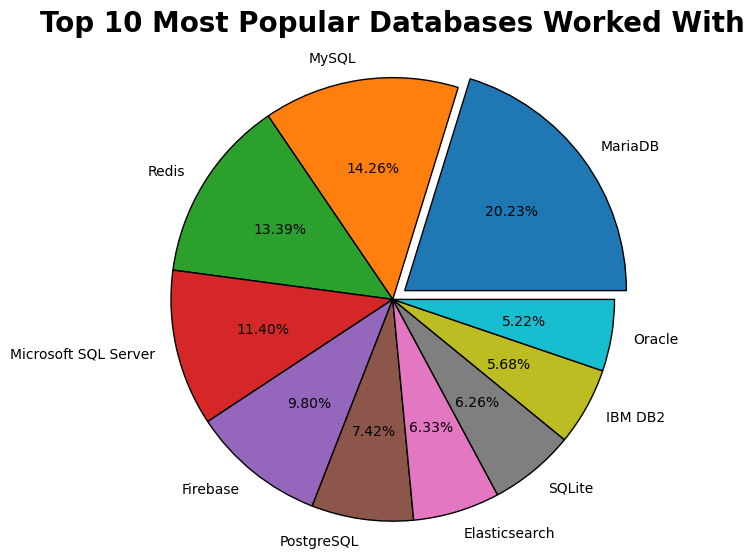

In [99]:
# Most Frequent Language Worked With

db = list((data.DatabaseWorkedWith.str.split(";", expand =  True).stack()))
for i  in range(len(db)):
    db[i] = db[i].strip()
    

    
wordcount=[]
for i in range (len(uniquedb)):
    ctr=0
    for k in range (len(db)):
        if (uniquedb[i]==db[k]):
            ctr+=1
    wordcount.append(ctr)

wcsorted=wordcount
wcsorted.sort(reverse=True)

udbsorted=[]

for j in range (len(wcsorted)):
        n=wordcount.index(wcsorted[j])
        udbsorted.append(uniquedb[n])
        
                
plt.pie(wcsorted[:10], labels = udbsorted[:10], radius=1.5, autopct='%2.2f%%', textprops={"fontsize":10}, wedgeprops={"edgecolor":"black"}, explode=[0.1,0.,0.,0,0,0,0,0,0,0])
plt.title('Top 10 Most Popular Databases Worked With', fontdict = {'size' : '20', 'fontweight' : 'bold'},pad=60)
plt.show()

<Figure size 800x800 with 0 Axes>

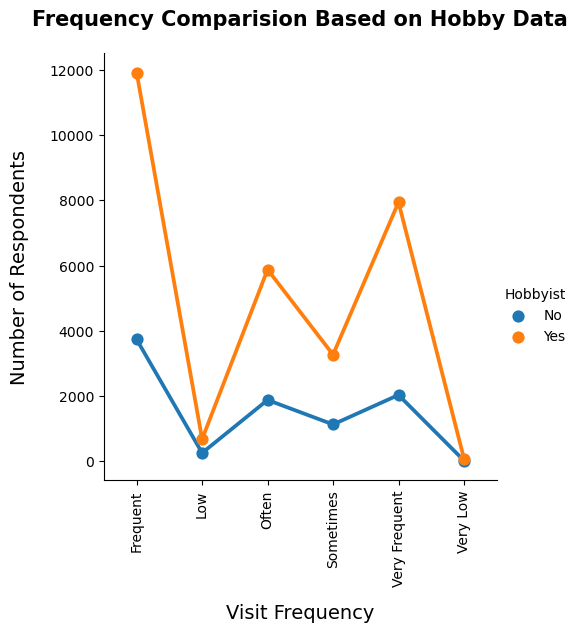

In [107]:
#Line graph deicting Visit Frequency divided over Hobbyist Values

plt.figure(figsize=(8,8))
newdata=data[['Hobbyist','SOVisitFreq']]
newdata=newdata.groupby(['SOVisitFreq','Hobbyist']).value_counts().reset_index(name='Total Content')
sns.catplot(data=newdata, x="SOVisitFreq", y="Total Content", hue='Hobbyist', kind='point', height=5).set_xticklabels(rotation=90)
plt.title("Frequency Comparision Based on Hobby Data", fontsize=15, fontweight='bold', pad=20)
plt.xlabel("Visit Frequency", fontsize=14, labelpad=12)
plt.ylabel("Number of Respondents", fontsize=14, labelpad=15)
plt.show()

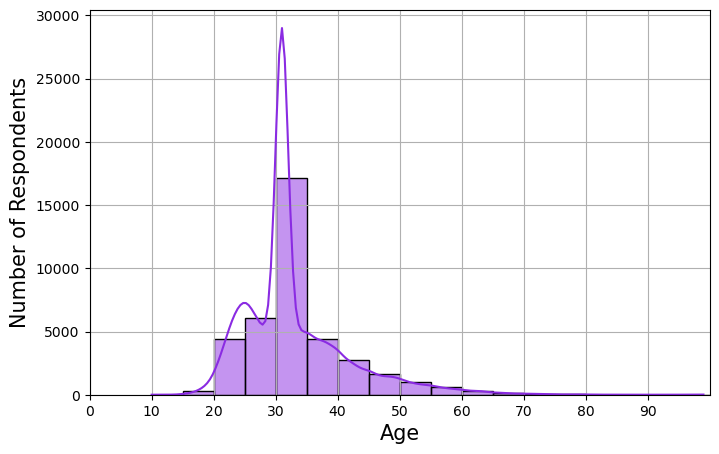

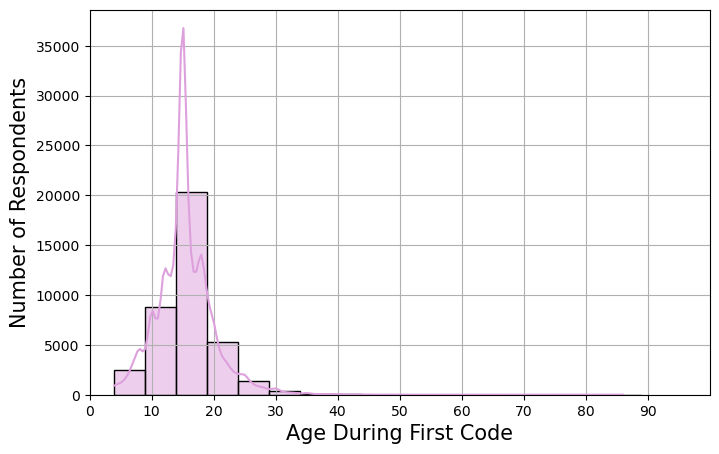

In [108]:
#Histogram for Age and Age during First Code Columns

plt.figure(figsize=(8,5))
hist=sns.histplot(data=data, x=data.Age, stat="count", binwidth=5, kde=True, color='blueviolet')
hist.set_ylabel( "Number of Respondents", fontsize=15)
hist.set_xlabel( "Age", fontsize=15)
hist.set_xlim(1, 100)
hist.xaxis.set_ticks(np.arange(0, 100,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
hist=sns.histplot(data=data, x=data.Age1stCode, stat="count", binwidth=5, kde=True, color='plum')
hist.set_ylabel( "Number of Respondents", fontsize=15)
hist.set_xlabel( "Age During First Code", fontsize=15)
hist.set_xlim(1, 100)
hist.xaxis.set_ticks(np.arange(0, 100,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()
plt.show()

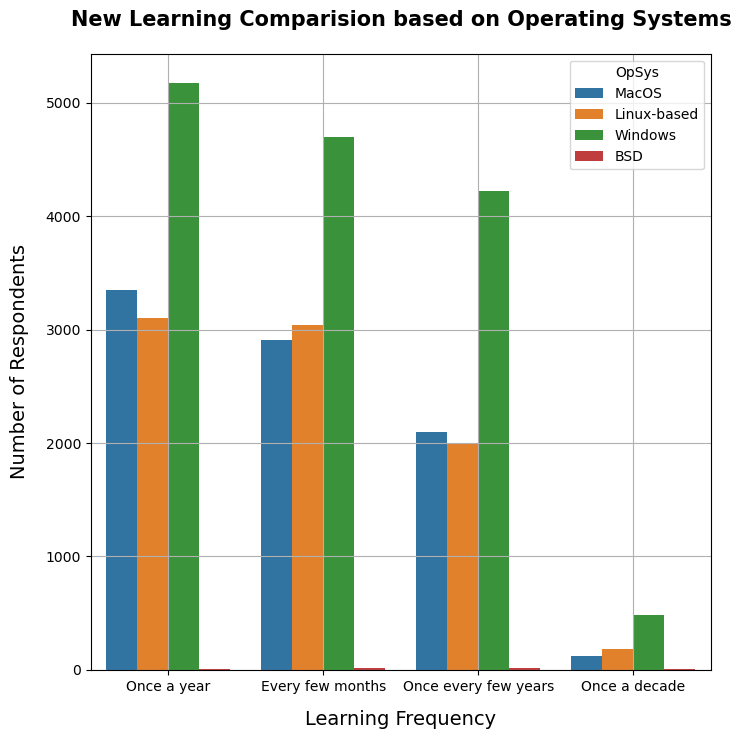

In [118]:
# New Learning Frequency Distribution studied along Operating System

fig, ax = plt.subplots(figsize=(8,8))
plt.title("New Learning Comparision based on Operating Systems", fontsize=15, fontweight='bold',pad=20)
sns.countplot(ax=ax, x=data['NEWLearn'], hue=data['OpSys'])
plt.xlabel("Learning Frequency", fontsize=14, labelpad=12)
plt.ylabel("Number of Respondents", fontsize=14, labelpad=12)
plt.grid(True)
plt.show()


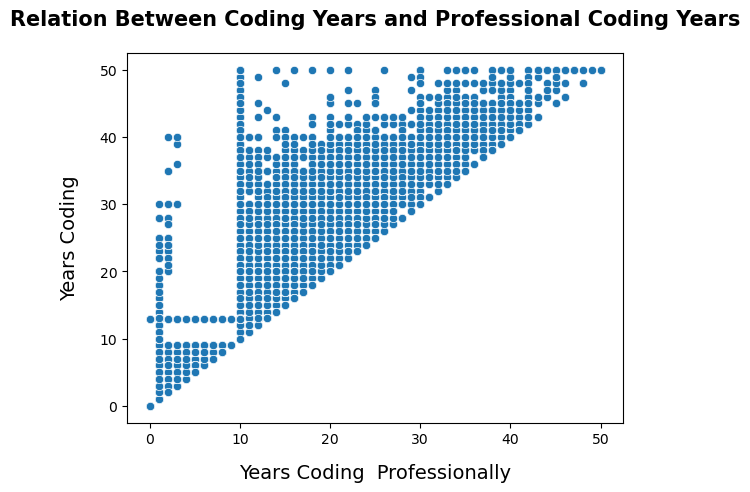

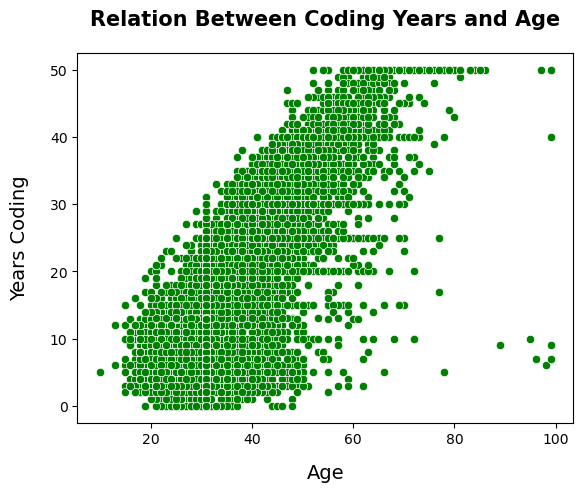

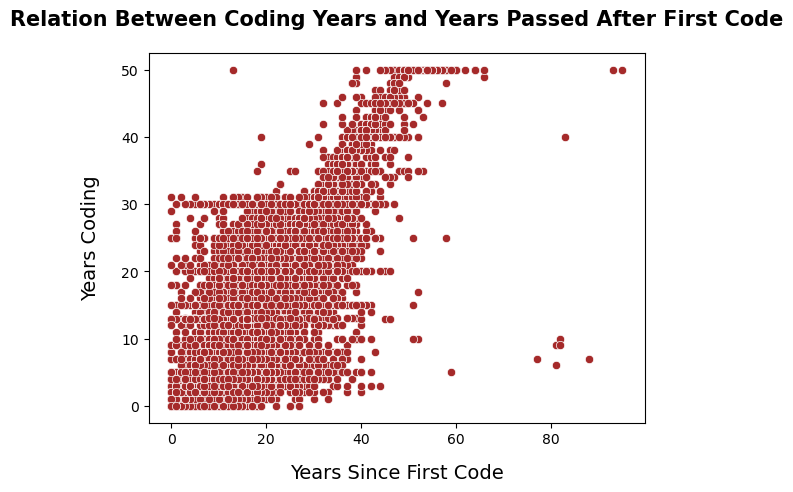

In [119]:
#Scatter Plots to study Dependency of Years sent Coding on Various Factors

sns.scatterplot(data['YearsCodePro'],data['YearsCode'])
plt.title("Relation Between Coding Years and Professional Coding Years", fontsize=15, fontweight='bold', pad=20)
plt.xlabel("Years Coding  Professionally", fontsize=14, labelpad=12)
plt.ylabel("Years Coding", fontsize=14, labelpad=15)
plt.grid(False)
plt.show()

print('\n')

sns.scatterplot(data['Age'],data['YearsCode'], color='green')
plt.title("Relation Between Coding Years and Age", fontsize=15, fontweight='bold', pad=20)
plt.xlabel("Age", fontsize=14, labelpad=12)
plt.ylabel("Years Coding", fontsize=14, labelpad=15)
plt.grid(False)
plt.show()

print('\n')

sns.scatterplot(data['Age']-data['Age1stCode'],data['YearsCode'], color='brown')
plt.title("Relation Between Coding Years and Years Passed After First Code", size=15, fontweight='bold', pad=20)
plt.xlabel("Years Since First Code", fontsize=14, labelpad=12)
plt.ylabel("Years Coding", fontsize=14, labelpad=15)
plt.grid(False)
plt.show()

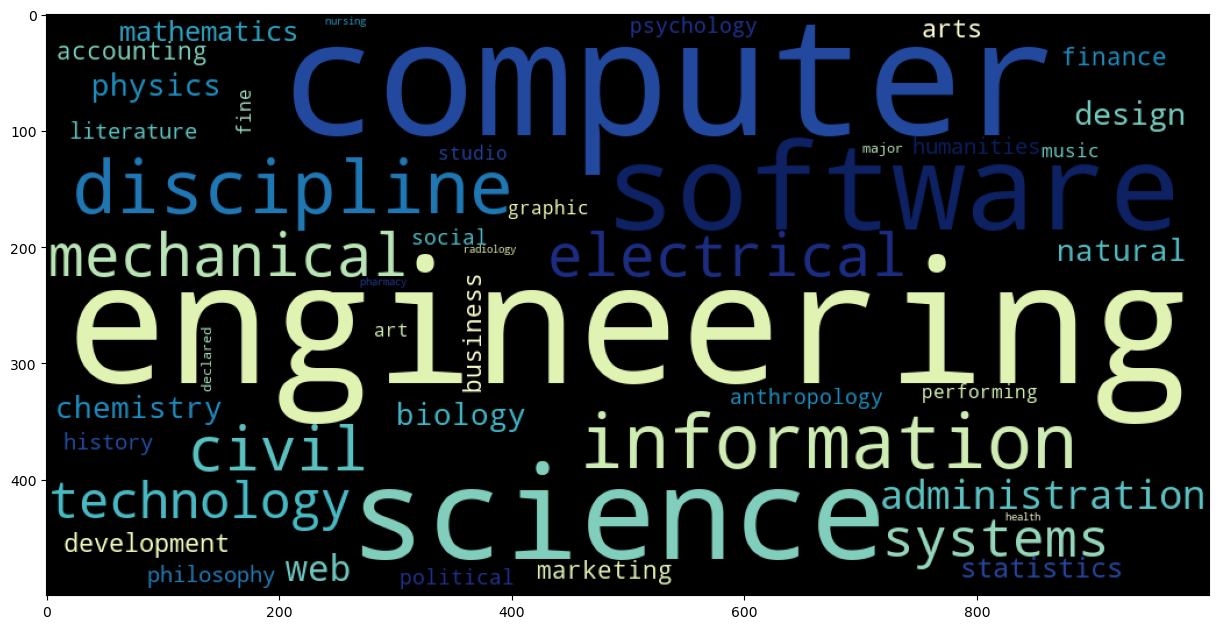

In [104]:
#WordCloud for the Undergraduation Majors of people using the website

fac = list((data.UndergradMajor.str.split(" ", expand =  True).stack()))
for i  in range(len(fac)):
    fac[i] = fac[i].strip()
    fac[i]=fac[i].translate(str.maketrans('','', string.punctuation))
    
fac = map(lambda x:x.lower(), fac)
fac = [word for word in fac if word not in ENGLISH_STOP_WORDS]
word_could_dict=Counter(fac)
wordcloud = WordCloud(width = 1000, height = 500, colormap='YlGnBu').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)